## The Analyze process include the following: <br>
Getting the average gdp value over of each state category from 2000 to 2022 <br>
column renaming to short and descriptive name if required <br>
Plot chart for comparison

In [1]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs


In [3]:
gdp = pd.read_csv("/home/ridwanullahi/Desktop/Work_Space/Play/oil-impact/data/processed/gdp/world/gdp_world_final_insight_03.csv") # read the data
gdp.head()

,country_name,country_code,currency,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,state_indicator
0,Aruba,ABW,GDP (current US$),1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,Non oil Producer
1,Afghanistan,AFG,GDP (current US$),NaN,NaN,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,Non oil Producer
2,Angola,AGO,GDP (current US$),9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,Oil Producer
3,Albania,ALB,GDP (current US$),3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,...,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10,Oil Producer
4,Andorra,AND,GDP (current US$),1.429048e+09,1.546912e+09,1.755990e+09,2.361636e+09,2.895048e+09,3.159827e+09,3.456265e+09,...,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09,Non oil Producer


In [4]:
numeric_column = [str(i) for i in range(2000, 2023)] # list of years from 2000 to 2022

oil_vs_non_oil_gdp = gdp.groupby("state_indicator")[numeric_column].mean().reset_index() # group by state_indicator and get the mean of the years
oil_vs_non_oil_gdp.head()

,state_indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Non oil Producer,3.115686e+10,3.044497e+10,3.146711e+10,3.646739e+10,4.283892e+10,4.870146e+10,5.468489e+10,6.501729e+10,7.329217e+10,...,8.784058e+10,8.840827e+10,7.729039e+10,7.842699e+10,8.414960e+10,8.738218e+10,8.796349e+10,8.533380e+10,1.005100e+11,1.211209e+11
1,Oil Producer,3.767719e+11,3.747659e+11,3.876197e+11,4.331000e+11,4.854411e+11,5.220404e+11,5.622569e+11,6.284780e+11,6.796734e+11,...,8.207884e+11,8.449980e+11,8.051425e+11,8.293864e+11,8.819309e+11,9.402189e+11,9.555221e+11,9.273541e+11,1.078389e+12,1.118187e+12


In [39]:
# Convert row to column using transpose function
oil_vs_non_oil_gdp_transposed = oil_vs_non_oil_gdp.transpose().reset_index()
# convert the first row to column header
oil_vs_non_oil_gdp_transposed.columns = oil_vs_non_oil_gdp_transposed.iloc[0]
# drop the first row
oil_vs_non_oil_gdp_final = oil_vs_non_oil_gdp_transposed.drop(0)
# Rename the state_indicator column to year
oil_vs_non_oil_gdp_final.rename(columns={"state_indicator": "Year"}, inplace=True)
# convert the year column to integer
oil_vs_non_oil_gdp_final["Year"] = oil_vs_non_oil_gdp_final["Year"].astype(int)

# transform the numeric column values into billions
oil_vs_non_oil_gdp_final["Oil Producer"] = oil_vs_non_oil_gdp_final["Oil Producer"].astype(float) / 1000000000
oil_vs_non_oil_gdp_final["Non oil Producer"] = oil_vs_non_oil_gdp_final["Non oil Producer"].astype(float) / 1000000000
oil_vs_non_oil_gdp_final.tail(10)
# check min and max values of the oil and non oil producers along the years
print("Min Oil Producer: ", oil_vs_non_oil_gdp_final["Oil Producer"].min() )
print("Max Oil Producer: ", oil_vs_non_oil_gdp_final["Oil Producer"].max())
print("Min Non Oil Producer: ", oil_vs_non_oil_gdp_final["Non oil Producer"].min())
print("Max Non Oil Producer: ", oil_vs_non_oil_gdp_final["Non oil Producer"].max())

Min Oil Producer:  374.765882234482
Max Oil Producer:  1118.1873772546355
Min Non Oil Producer:  30.44497182916152
Max Non Oil Producer:  121.12091956442038


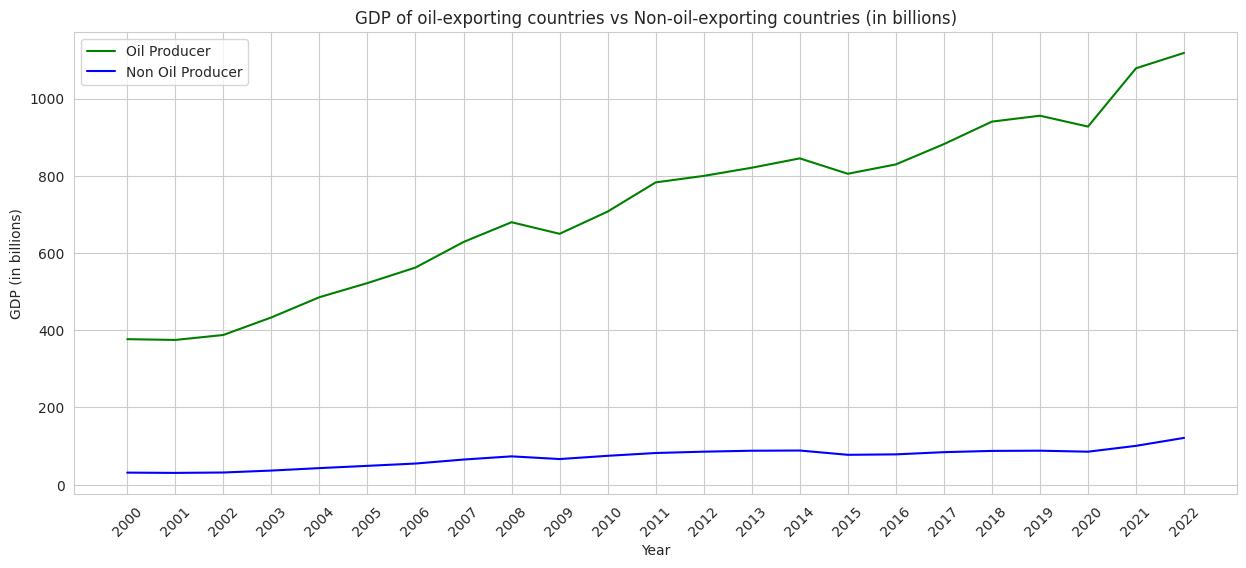

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=oil_vs_non_oil_gdp_final, x="Year", y="Oil Producer", label="Oil Producer", color="green", legend=True)
sns.lineplot(data=oil_vs_non_oil_gdp_final, x="Year", y="Non oil Producer", label="Non Oil Producer", color="blue", legend=True)

plt.title("GDP of oil-exporting countries vs Non-oil-exporting countries (in billions)")
plt.ylabel("GDP (in billions)")
plt.xlabel("Year")
plt.xticks(oil_vs_non_oil_gdp_final['Year'].unique().tolist(), rotation=45)
plt.show()